In [1]:
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 300
from pathlib import Path
import sys

import matplotlib.pyplot as plt
import numpy as np

In [2]:
def load_pkl_object(filename: str):
    """Helper to reload pickle objects."""
    import pickle

    with open(filename, "rb") as input:
        obj = pickle.load(input)
    print(f"Loaded data from {filename}.")
    return obj

Loaded data from /Users/martin/Documents/GitHub/gymnax-blines/agents/PuzzlePacking/grid10/ppo.pkl.
Loaded data from /Users/martin/Documents/GitHub/gymnax-blines/agents/PuzzlePacking/grid10/ppo0.001.pkl.
Loaded data from /Users/martin/Documents/GitHub/gymnax-blines/agents/PuzzlePacking/grid10/ppo0.0001.pkl.


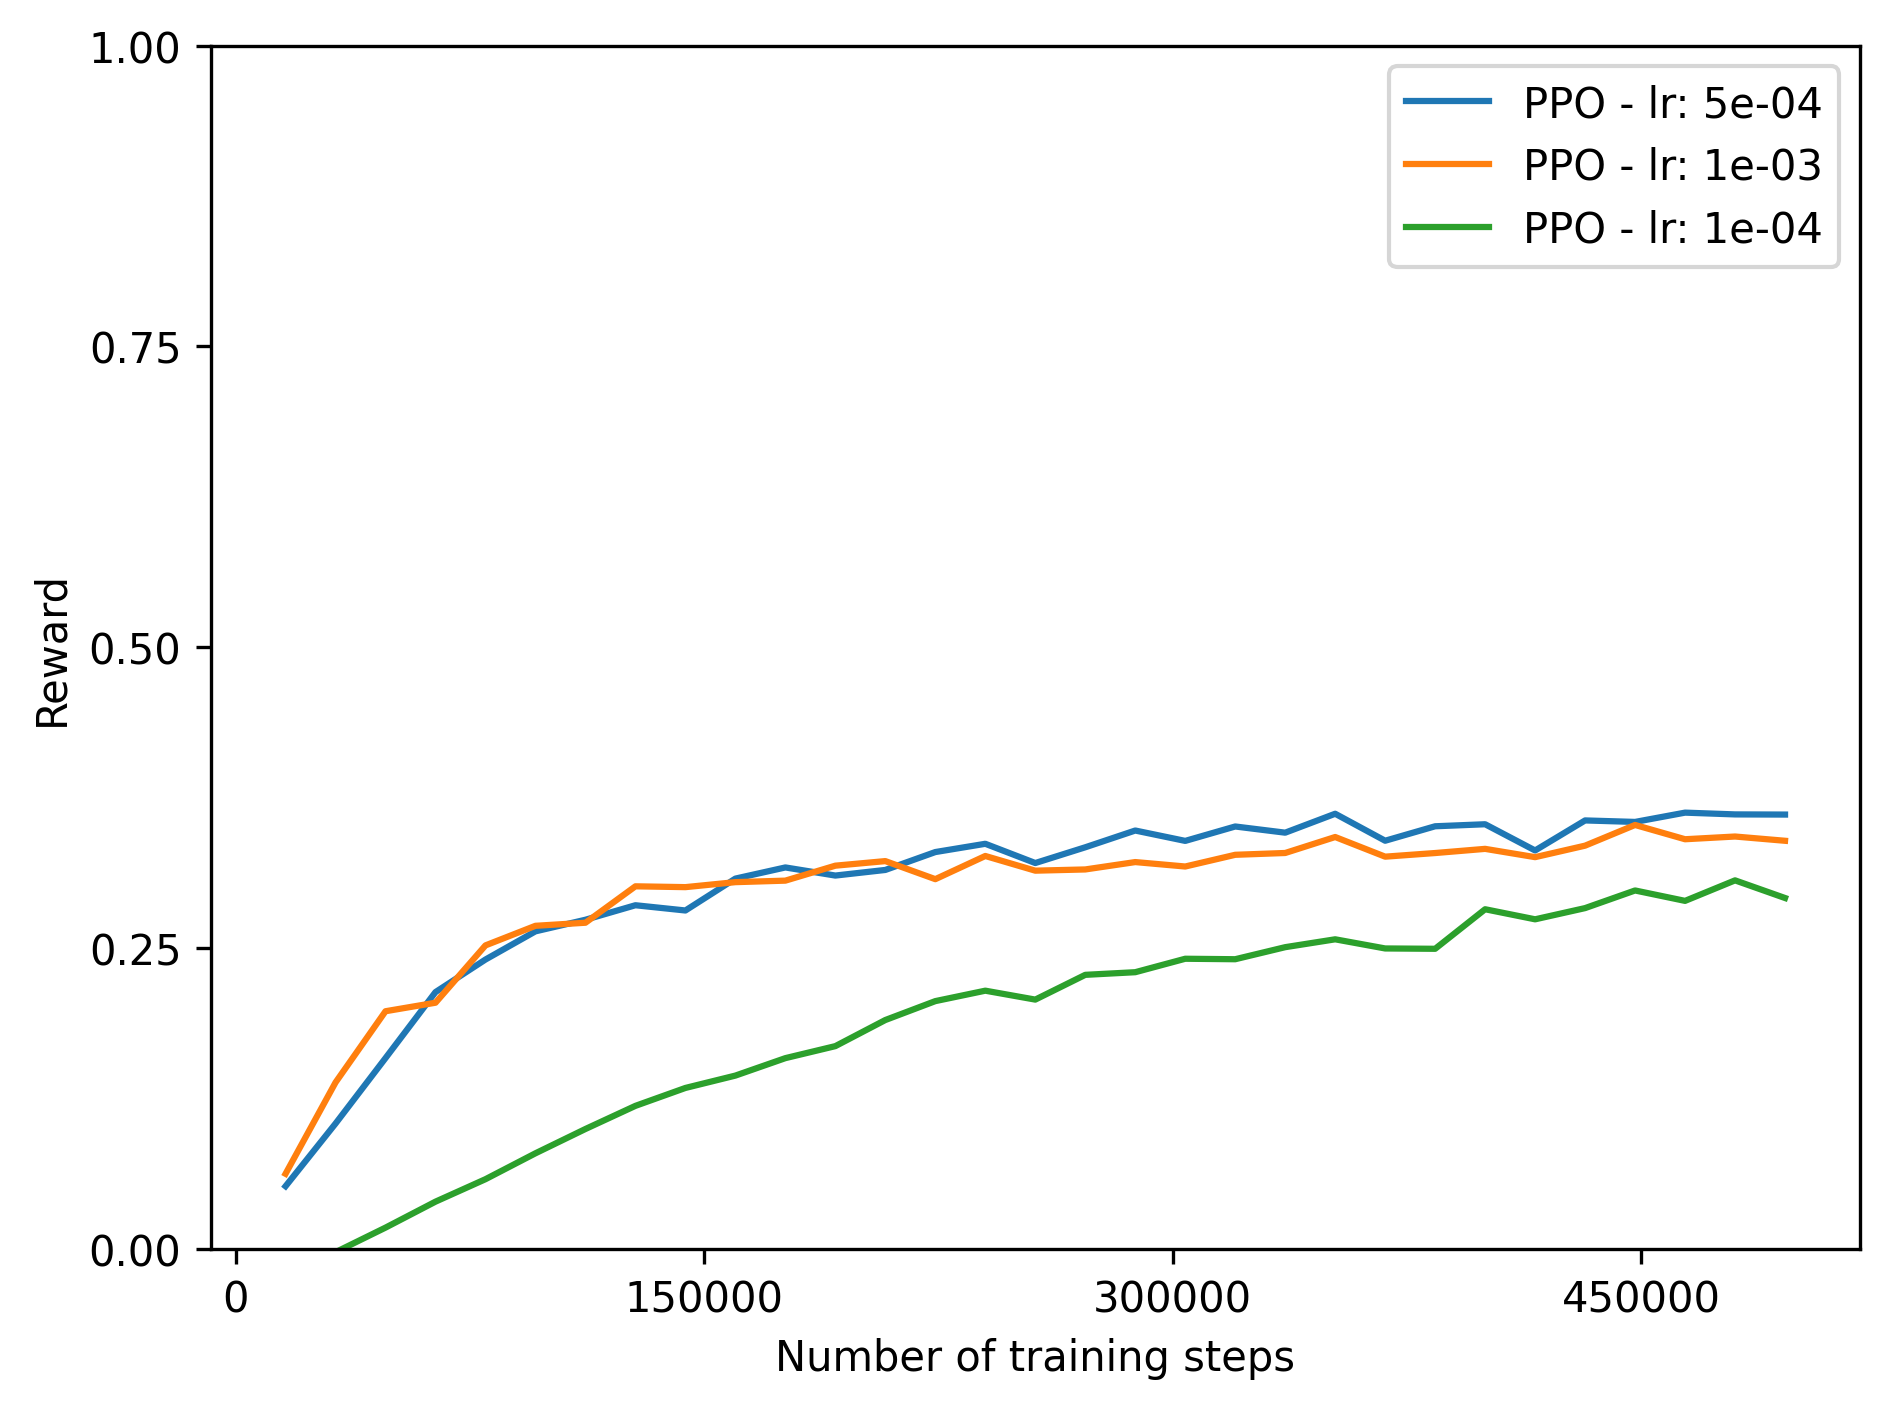

In [11]:
e = 'PuzzlePacking'
fig, ax = plt.subplots()
root_path = Path('/Users/martin/Documents/GitHub/gymnax-blines/agents/PuzzlePacking')
problem = 'grid10'
my_path = root_path / problem

results = load_pkl_object((my_path / 'ppo.pkl'))
steps = results["log_steps"]
cum_rew = results["log_return"]
ax.plot(steps, cum_rew, label="PPO - lr: 5e-04")

results = load_pkl_object((my_path / 'ppo0.001.pkl'))
steps = results["log_steps"]
cum_rew = results["log_return"]
ax.plot(steps, cum_rew, label="PPO - lr: 1e-03")

results = load_pkl_object((my_path / 'ppo0.0001.pkl'))
steps = results["log_steps"]
cum_rew = results["log_return"]
ax.plot(steps, cum_rew, label="PPO - lr: 1e-04")

ax.set_xticks(steps)
ax.xaxis.set_major_locator(plt.MaxNLocator(4))
ax.yaxis.set_major_locator(plt.MaxNLocator(4))
ax.set_ylim([0.0, 1.0])
ax.legend()

ax.set_ylabel('Reward')
ax.set_xlabel('Number of training steps')

fig.tight_layout()

fig.savefig(f'./{problem}_ppo_performance.png', dpi=300, bbox_inches='tight')